## kNN. Линейные модели. Работа с признаками

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/sample_data/penguins_data.csv')
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


**Задача 1.1** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

In [ ]:
# Удаляем строки с пропущенными значениями
data_cleaned = data.dropna()
print(f"Размер исходного датасета: {data.shape}")
print(f"Размер датасета после удаления пропусков: {data_cleaned.shape}")

# Посмотрим на типы данных и уникальные значения
print("\nТипы данных:")
print(data_cleaned.dtypes)

print("\nУникальные значения категориальных признаков:")
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {data_cleaned[col].unique()}")

Размер исходного датасета: (344, 11)
Размер датасета после удаления пропусков: (325, 11)

Типы данных:
Species                 object
Island                  object
Clutch Completion       object
Date Egg                 int64
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
dtype: object

Уникальные значения категориальных признаков:
Species: ['Chinstrap' 'Gentoo' 'Adelie']
Island: ['Dream' 'Biscoe' 'Torgersen']
Clutch Completion: ['Yes' 'No']
Sex: ['MALE' 'FEMALE' '.']


Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import pandas as pd

X = data_cleaned.drop('Species', axis=1)
y = data_cleaned['Species']
encoder = OrdinalEncoder(categories=[['Chinstrap', 'Gentoo', 'Adelie']])
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1)).ravel()

print("\n=== Результат ===")
print(f"Признаки (X): {X.shape}")
print(f"Целевая переменная (y): {y_encoded.shape}")
print("Уникальные значения в y:", np.unique(y_encoded))
print("Соответствие классов:", dict(zip(encoder.categories_[0], range(3))))


=== Результат ===
Признаки (X): (325, 10)
Целевая переменная (y): (325,)
Уникальные значения в y: [0. 1. 2.]
Соответствие классов: {'Chinstrap': 0, 'Gentoo': 1, 'Adelie': 2}


**Задача 1.2** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Фиксируем random seed для воспроизводимости результатов
np.random.seed(42)

# Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.3,
    random_state=42,
    stratify=y_encoded  # Стратифицированное разбиение
)

print("Размеры выборок:")
print(f"Тренировочная: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Тестовая: X_test {X_test.shape}, y_test {y_test.shape}")

print("\nРаспределение классов в y_train:")
print(pd.Series(y_train).value_counts().sort_index())
print("\nРаспределение классов в y_test:")
print(pd.Series(y_test).value_counts().sort_index())

Размеры выборок:
Тренировочная: X_train (227, 10), y_train (227,)
Тестовая: X_test (98, 10), y_test (98,)

Распределение классов в y_train:
0.0    47
1.0    83
2.0    97
Name: count, dtype: int64

Распределение классов в y_test:
0.0    20
1.0    36
2.0    42
Name: count, dtype: int64


stratify обеспечивает стратифицированное разбиение, при котором пропорции классов в тренировочной и тестовой выборках соответствуют пропорциям в исходных данных

**Задача 1.3** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Выбираем два признака
flipper_col = [col for col in X_train.columns if 'flipper' in col.lower() or 'length' in col.lower()][0]
mass_col = [col for col in X_train.columns if 'mass' in col.lower() or 'body' in col.lower()][0]

X_train_two = X_train[[flipper_col, mass_col]]
X_test_two = X_test[[flipper_col, mass_col]]

# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_two)
X_test_scaled = scaler.transform(X_test_two)

# Обучение классификаторов
k_values = [1, 3, 5, 10, 15, 25]
results = []

print("\nРезультаты классификации")
print(" k  Train  Test ")


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)

    train_acc = accuracy_score(y_train, knn.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, knn.predict(X_test_scaled))
    results.append((k, train_acc, test_acc))

    print(f"{k:2d} {train_acc:.4f}  {test_acc:.4f}")


Результаты классификации
 k  Train  Test 
 1 1.0000  0.9184
 3 0.9471  0.9286
 5 0.9427  0.9490
10 0.9383  0.9490
15 0.9339  0.9490
25 0.9339  0.9388


**Задача 1.4** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

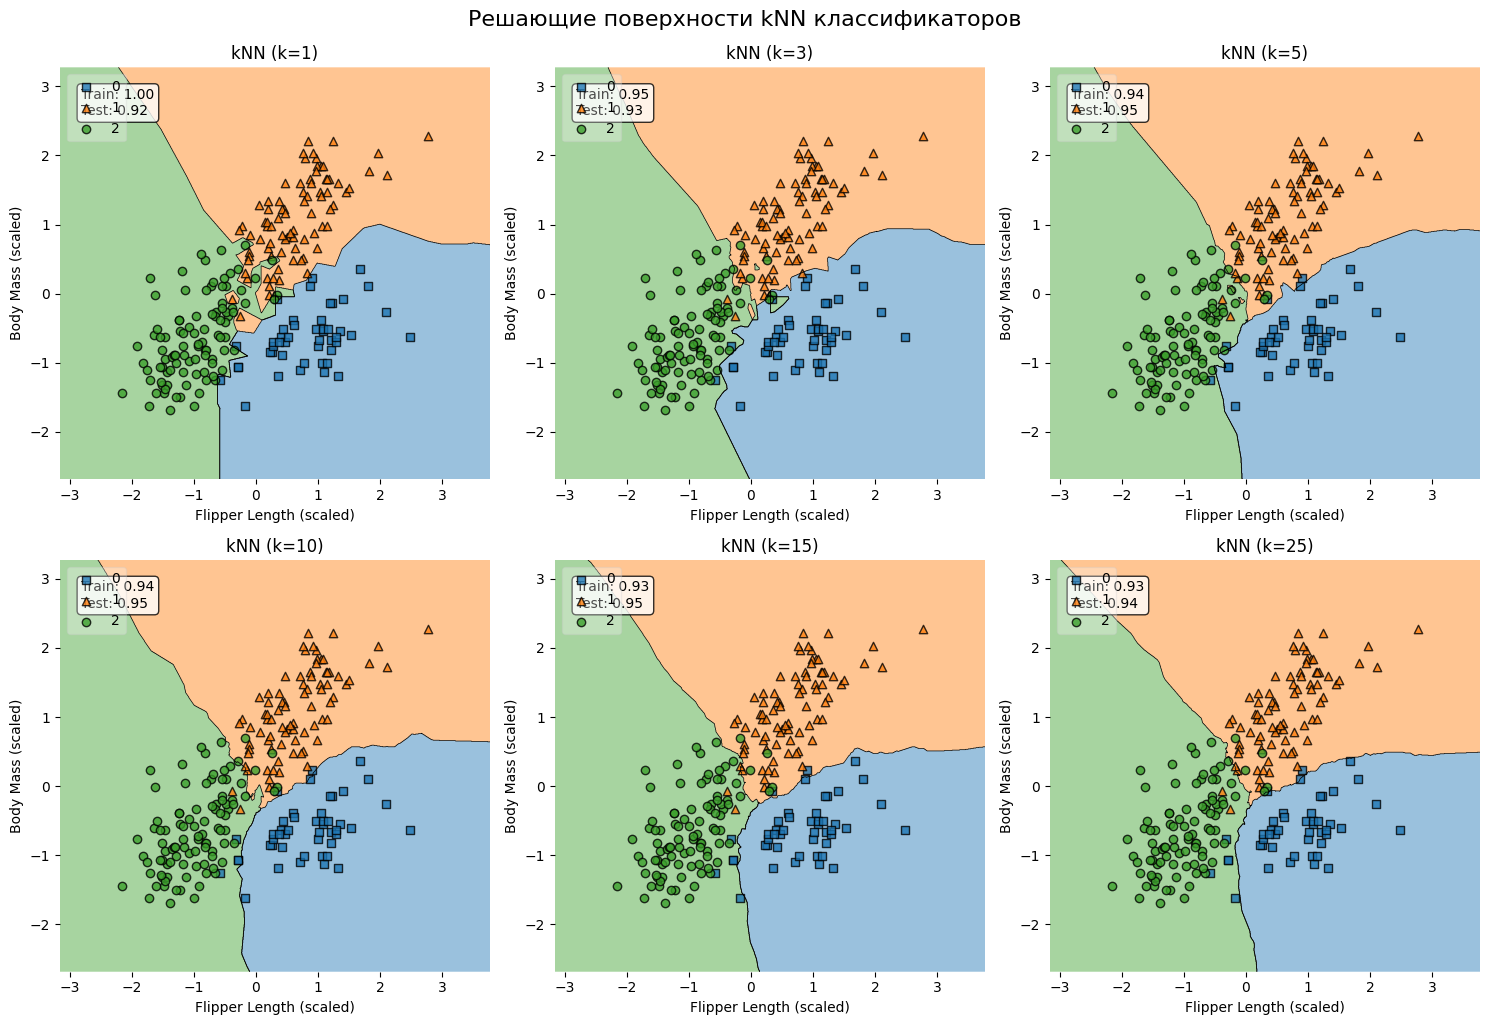

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
import numpy as np

# Создаем список обученных классификаторов (если не сохранили ранее)
classifiers = []
k_values = [1, 3, 5, 10, 15, 25]


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    classifiers.append(knn)


# Подготовка данных для визуализации
# Преобразуем в numpy arrays и используем только два признака
X_vis = X_train_scaled  # уже масштабированные данные
y_vis = y_train

# Создаем фигуру и сетку графиков
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 3, figure=fig)  # 2 строки, 3 столбца

# Список для осей
axes = []
for i in range(2):
    for j in range(3):
        ax = fig.add_subplot(gs[i, j])
        axes.append(ax)


# Строим решающие поверхности для каждого классификатора
for ax, knn, k in zip(axes, classifiers, k_values):
    # Строим решающую поверхность
    plot_decision_regions(X_vis, y_vis.astype(int), clf=knn, legend=2, ax=ax, X_highlight=None)

    # Настраиваем оформление
    ax.set_title(f'kNN (k={k})')
    ax.set_xlabel('Flipper Length (scaled)')
    ax.set_ylabel('Body Mass (scaled)')

    # Добавляем информацию о точности
    train_acc = accuracy_score(y_train, knn.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, knn.predict(X_test_scaled))
    ax.text(0.05, 0.95, f'Train: {train_acc:.2f}\nTest: {test_acc:.2f}',
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.suptitle('Решающие поверхности kNN классификаторов', y=1.02, fontsize=16)
plt.show()



**Задача 1.6** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

Геометрическая интерпретация:

При малых k модель создает границы, которые "огибают" каждую тренировочную точку

При оптимальных k границы следуют общим тенденциям распределения классов

При больших k границы становятся слишком грубыми и не учитывают локальные особенности

Признаки переобучения:

Высокая точность на train + низкая на test

Сложные, извилистые границы решений

Большая чувствительность к выбросам

### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

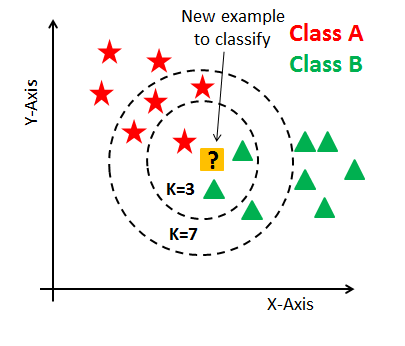

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):

      # YOUR CODE HERE
      # (⌒_⌒;)

      pass

    def predict(self, X):

      # YOUR CODE HERE
      # (＠_＠)

      pass

    def count_distance(self, x, y):

      # YOUR CODE HERE
      # ヽ(♡‿♡)ノ

      pass

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k: int):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        """
        Сохраняем тренировочные данные
        """
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self

    def count_distance(self, x, y):
        """
        Вычисление евклидова расстояния между двумя точками
        """
        return np.linalg.norm(x - y)

    def predict_single(self, x):
        """
        Предсказание для одного примера
        """
        # Вычисляем расстояния до всех тренировочных точек
        distances = np.linalg.norm(self.X_train - x, axis=1)

        # Находим индексы k ближайших соседей
        k_nearest_indices = np.argsort(distances)[:self.k]

        # Получаем метки k ближайших соседей
        k_nearest_labels = self.y_train[k_nearest_indices]

        # Находим наиболее частую метку
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def predict(self, X):
        """
        Предсказание для множества примеров
        """
        X = np.array(X)

        # Векторизованная версия - вычисляем все расстояния сразу
        # Используем broadcasting: (n_test, 1, n_features) - (1, n_train, n_features)
        distances = np.sqrt(np.sum((X[:, np.newaxis, :] - self.X_train[np.newaxis, :, :]) ** 2, axis=2))

        # Находим индексы k ближайших соседей для каждого тестового примера
        k_nearest_indices = np.argsort(distances, axis=1)[:, :self.k]

        # Получаем метки k ближайших соседей
        k_nearest_labels = self.y_train[k_nearest_indices]

        # Находим наиболее частую метку для каждого примера
        predictions = np.array([Counter(labels).most_common(1)[0][0]
                              for labels in k_nearest_labels])

        return predictions

In [ ]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задача 2.2** Протестируйте ваш алгоритм на данных о пингвинах.

*   Новый пункт
*   Новый пункт

Выведите лучший получившийся результат на тестовой выборке.

In [ ]:
# Быстрое тестирование
print("БЫСТРОЕ ТЕСТИРОВАНИЕ СОБСТВЕННОЙ РЕАЛИЗАЦИИ KNN")

# Тестируем только оптимальные k
test_k_values = [3, 5, 7, 10]

best_accuracy = 0
best_k = 0

for k in test_k_values:
    my_knn = KNN(k=k)
    my_knn.fit(X_train_scaled, y_train)
    predictions = my_knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)

    print(f"k={k}: Точность = {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"\n ЛУЧШИЙ РЕЗУЛЬТАТ: k={best_k}, точность={best_accuracy:.4f}")

# Проверяем, что предсказания совпадают с sklearn
sklearn_knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
sklearn_knn.fit(X_train_scaled, y_train)
sklearn_predictions = sklearn_knn.predict(X_test_scaled)
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)

print(f"Sklearn KNN (k={best_k}): {sklearn_accuracy:.4f}")
print(f"Результаты совпадают: {np.allclose(predictions, sklearn_predictions)}")

БЫСТРОЕ ТЕСТИРОВАНИЕ СОБСТВЕННОЙ РЕАЛИЗАЦИИ KNN
k=3: Точность = 0.9184
k=5: Точность = 0.9490
k=7: Точность = 0.9490
k=10: Точность = 0.9592

 ЛУЧШИЙ РЕЗУЛЬТАТ: k=10, точность=0.9592
Sklearn KNN (k=10): 0.9490
Результаты совпадают: False


### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

**Задача 3.2** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

**Задача 3.3** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

**Задача 3.4** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

**Задача 3.5** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

Объясните, как это повлияет на интерпретацию коэффициентов линейной регрессии.

**Задача 3.6** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

**Задача 3.7** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

**Задача 3.8** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

## Бонусная часть

**Задача 3.9** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

**Задача 3.11** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

**Задача 3.12** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.